<a href="https://colab.research.google.com/github/KashishRahate/AI-Assignments/blob/main/Notebook/Animefy-yourself-new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Animefy yourself!

A markdown introduction is [here](https://github.com/XingruiWang/Animefy/blob/master/README.md), which include the detailed description and code.

<img src="https://raw.githubusercontent.com/XingruiWang/Animefy/master/example/example.png" alt="example" style="width: 100%;" />


### 1: About

A "selfie2anime" project based on StyleGAN2. You can generate your own animate faces base on real-world selfie. The whole "selfie2anime" project is based on StyleGAN2\[[Official code](https://github.com/NVlabs/stylegan2)\]\[[paper](https://arxiv.org/abs/1912.04958)\]\[[video](https://youtu.be/c-NJtV9Jvp0)\]and layer swapping technique proposed by [Justin Pinkney](https://www.justinpinkney.com/). And also thanks for the highly reproduceable Pytorch reimplementing styleGAN2 project by [Tetratrio](https://github.com/Tetratrio/stylegan2_pytorch) .


Folder tree:

```
Animefy
│  README.md -------------------------------- Description of the projects.
│  latent.sh -------------------------------- The script to find latent feature of a given image.
│  run.sh ----------------------------------- The script to train the model.
│  synthesis.sh ----------------------------- The script to generate animate image without condition.
│  align_images.py -------------------------- Align the face of given images, since the given selfie image might not in the same scale.
│  blend.py --------------------------------- Blend the model after well trained.
│  generate.py ------------------------------ Generate animate image based on the latent code.
│  run_convert_from_tf.py ------------------- Convert pretrained model file in tensorflow to pytorch.
│  run_generator.py ------------------------- Generate animte images without condition (i.e. latent code), called by `synthesis.sh`.
│  run_metrics.py --------------------------- Caculate the metric of trained model.
│  run_projector.py ------------------------- Find latent feature of a given image, called by `latent.sh`.
│  run_training.py -------------------------- Train the model, called by `run.sh`.
│  requirements.txt ------------------------- Environment required, can be set up using `pip install -r requirements.txt`.
│  settings_with_pretrain.yaml -------------- Configuration when training the model.
│
├─environment
│      anime.yaml
│
├─example
│      example.png ------------------------- Example image of the process of finding latent code and generate corresponding anime image by interating.
│
├─Notebook
│      Animefy-yourself.ipynb -------------- Description notebook of the project.
│
├─projects
│  │  resize.py ---------------------------- Might be useless now, resize the selfie image to 512 × 512.
│  │
│  └─latent
│          image0000-target.png
│
└─stylegan2 -------------------------------- Core files.
    │  loss_fns.py ------------------------- Loss function.
    │  models.py --------------------------- StyleGAN2 model file
    │  modules.py -------------------------- Dependence module of StyleGAN2.
    │  project.py -------------------------- Find the latent code.
    │  train.py ---------------------------- Define class `Trainer` to train the model.
    │  utils.py ---------------------------- Utility file of model and training.
    │  __init__.py ------------------------- Using for importing.
    │
    ├─external_models
    │      inception.py -------------------- Inception module.
    │      lpips.py ------------------------ Caculate the similarity between images.
    │      __init__.py
    │
    └─metrics ------------------------------ Metric file.
            fid.py ------------------------- Fréchet Inception Distance。
            ppl.py ------------------------- Perplexity.
            __init__.py -------------------- Using for importing.

```


### 3. Train the model

#### 3.1. Dataset

The animate faces datast we used is [here](http://www.seeprettyface.com/mydataset_page3.html#anime)，this dataset is processed from [DANBOORU2018](https://www.gwern.net/Danbooru2020#danbooru2018). The dataset contains 140000 animate faces.[[Baidu Drive](https://pan.baidu.com/share/init?surl=8pHjzcOWhVF2u6LKOlT3yg) (code：JIMD)]

#### 3.2. Installation

1. Clone from github：

In [2]:
!git clone https://github.com/XingruiWang/Animefy.git
%cd Animefy

Cloning into 'Animefy'...
remote: Enumerating objects: 532, done.
remote: Counting objects: 100% (227/227), done.
remote: Compressing objects: 100% (144/144), done.
remote: Total 532 (delta 90), reused 207 (delta 80), pack-reused 305 (from 1)
Receiving objects: 100% (532/532), 39.21 MiB | 35.56 MiB/s, done.
Resolving deltas: 100% (205/205), done.
/content/Animefy


2. Dependencies（finish in command line）

```bash
conda env create -f environment/anime.yaml
conda activate anime
pip install -r requirements.txt
```

#### 3.3. Training

(Due to the size of origin dataset, I use sample data here. If your want to train on the original data, please download it first)

- Download pretrain model on FFHQ `./G_pretrain.pth` ([google drive](https://drive.google.com/uc?id=19vr5taIJSbNMiqihW1-vWSZkXUK7tdPR))

In [3]:
!gdown --id 19vr5taIJSbNMiqihW1-vWSZkXUK7tdPR

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=19vr5taIJSbNMiqihW1-vWSZkXUK7tdPR
From (redirected): https://drive.google.com/uc?id=19vr5taIJSbNMiqihW1-vWSZkXUK7tdPR&confirm=t&uuid=4715c8b6-ebf5-42c5-9151-f75caf7f2a1f
To: /content/Animefy/G_pretrain.pth
100% 121M/121M [00:02<00:00, 56.9MB/s]


- Train by running

In [ ]:
!python run_training.py settings.yaml

or running in script `run.sh`

```bash
sh run.sh
```

* Here `settings.yaml` store the configuration of training. If you want to train it again, set `data_dir` to your own animate face data. And you can set `g_file` and `d_file` if your are loading the pretrain model.

```yaml
# Here is an example training config file for 512x512 images.
channels: [32, 64, 128, 256, 512, 512, 512, 512]
tensorboard_log_dir: 'runs/stylegan2_512x512'
tensorboard_image_interval: 20
checkpoint_dir: 'checkpoints/stylegan2_512x512'
checkpoint_interval: 500
data_dir: data/anime_face
output_dir: train_output
gpu: [0, 1, 2, 3]
g_file: G_pretrain.pth
iterations: 10000

```

* For the first time of training, I set `G_file` to the pretrain model of FFHQ face data, while `D_file` is not compulsory.

- I train the model on 4 GPUs (Titan V)，for around 20,000 iteration (not epochs) and 2 days in total.

- You can download my pretrain model `./G_out.pth` ([google drive](https://drive.google.com/file/d/1J6sJaRZJg4dAoSw03fyanWV2oEscOeSk/view?usp=sharing))

In [5]:
!gdown --id 1J6sJaRZJg4dAoSw03fyanWV2oEscOeSk

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1J6sJaRZJg4dAoSw03fyanWV2oEscOeSk
From (redirected): https://drive.google.com/uc?id=1J6sJaRZJg4dAoSw03fyanWV2oEscOeSk&confirm=t&uuid=358983bf-8eb3-4070-b0c1-aaf984415d3f
To: /content/Animefy/G_out.pth
100% 121M/121M [00:01<00:00, 90.6MB/s]


### Layer Swapping

- The trained model is not enough to generate custom animate faces. Inspired by  [Justin Pinkney](https://www.justinpinkney.com/), we blended the human faces generating model and our animate faces generating model in order to keep the low resolution information of real world human face (gesture, head position and angle) and high resolution information (big eyes, small nose, hair style and etc. ) of animate faces.

- I reimplement the [blend_models.py](https://github.com/justinpinkney/stylegan2/blob/master/blend_models.py) by pytorch ([here](https://github.com/XingruiWang/Animefy/blob/master/blend.py))


In [6]:
from blend import blend_models

G_out = blend_models("G_pretrain.pth",
                     "G_out.pth",
                     8, None)
G_out.save('G_blend.pth')

/content/Animefy/stylegan2/models.py:196: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return _deserialize(torch.load(fpath, map_location=map_location))


### Generate your animate faces！

In [7]:
%mkdir raw
%mkdir latent
%mkdir aligned

1. Put your photo in the folder `raw`.

Here I use a sample images.

In [18]:
!wget http://www.seeprettyface.com/images/female_example.png -O raw/example.jpg

--2024-11-11 16:13:09--  http://www.seeprettyface.com/images/female_example.png
Resolving www.seeprettyface.com (www.seeprettyface.com)... 180.76.157.127
Connecting to www.seeprettyface.com (www.seeprettyface.com)|180.76.157.127|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1481069 (1.4M) [image/png]
Saving to: ‘raw/example.jpg’

raw/example.jpg     100%[===================>]   1.41M   561KB/s    in 2.6s    

2024-11-11 16:13:16 (561 KB/s) - ‘raw/example.jpg’ saved [1481069/1481069]



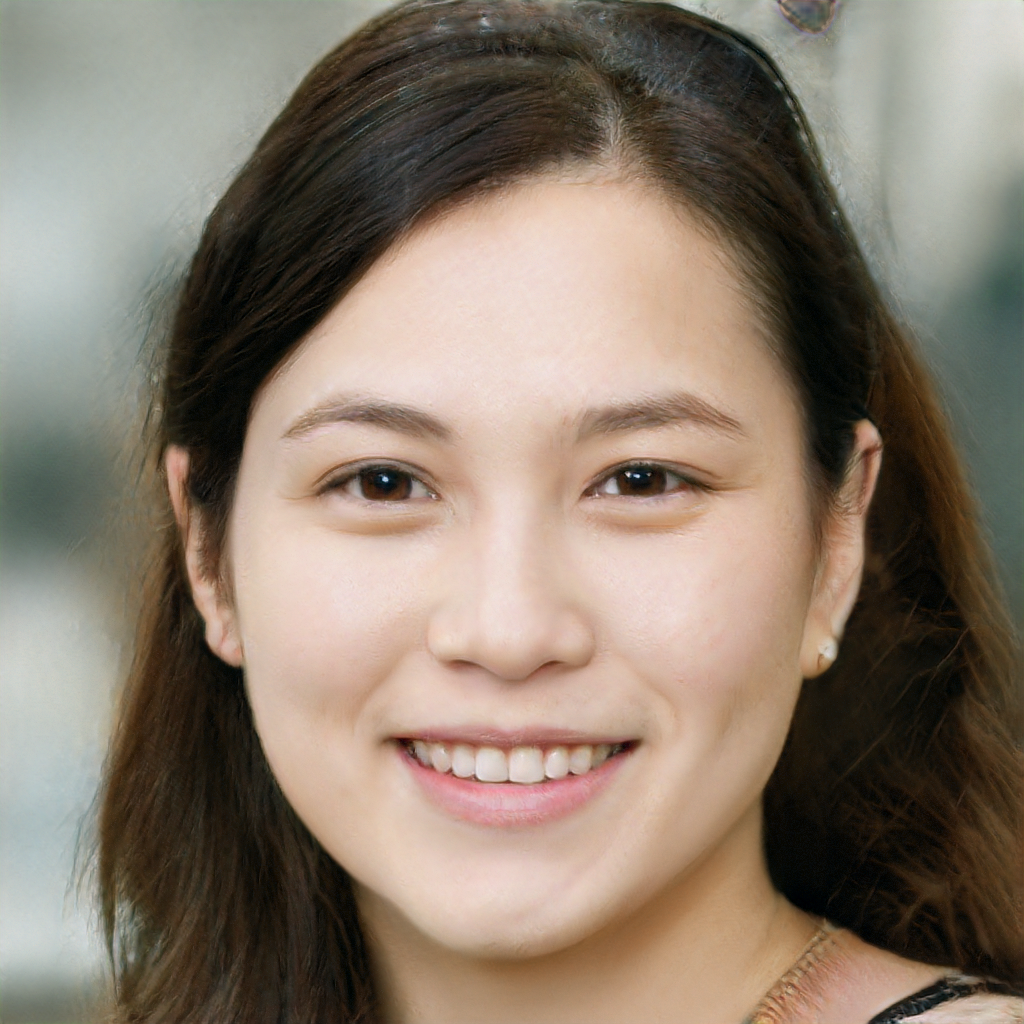

In [19]:
from IPython.display import Image
Image(filename='raw/example.jpg')

In [25]:
!pip show face_alignment

Name: face-alignment
Version: 1.4.1
Summary: Detector 2D or 3D face landmarks from Python
Home-page: https://github.com/1adrianb/face-alignment
Author: Adrian Bulat
Author-email: adrian@adrianbulat.com
License: BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: numba, numpy, opencv-python, scikit-image, scipy, torch, tqdm
Required-by: 


2. Face alignment

In [28]:
!python align_images.py raw aligned

2024-11-11 16:20:12.748958: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-11 16:20:12.786530: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-11 16:20:12.801241: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-11 16:20:14.409634: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


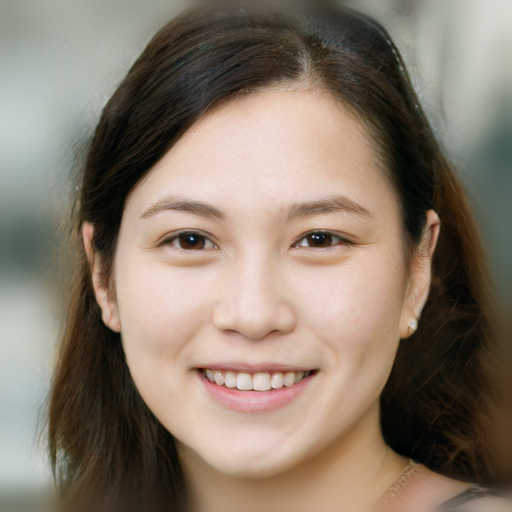

In [29]:
Image(filename='aligned/example_01.png')

In [35]:
!rm -R test/train/.ipynb_checkpoints
!ls test/train/ -a   #to make sure that the deletion has occurred

rm: cannot remove 'test/train/.ipynb_checkpoints': No such file or directory
ls: cannot access 'test/train/': No such file or directory


3. Feature projection

In [43]:
!python run_projector.py project_real_images --network=G_pretrain.pth --data_dir=aligned/test/ --output=latent/ --num_steps=400 --gpu=0

2024-11-11 16:59:46.109043: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-11 16:59:46.144511: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-11 16:59:46.154315: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-11 16:59:47.691337: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/content/Animefy/stylegan2/models.py:196: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data whi

4. Gererate the image!

In [42]:
import os
import numpy as np
import torch
import stylegan2
from stylegan2 import utils
import cv2 as cv
from google.colab.patches import cv2_imshow
from tqdm import tqdm
dir = 'latent'

G_blend = 'G_blend.pth'
# G_blend = 'Gs.pth'

def synthesis(G_file, latent_file):
    device = torch.device(0)
    G = stylegan2.models.load(G_file).G_synthesis
    latent = np.load(latent_file, allow_pickle=True)
    G.to(device)
    latent = torch.tensor(latent[np.newaxis, ...]).to(device)
    out = G(latent)
    out = utils.tensor_to_PIL(out, pixel_min=-1, pixel_max=1)[0]
    return out

for l in tqdm(sorted(os.listdir(dir))):
  if l[-3:] != 'npy':
    continue
  latent = os.path.join(dir, l)
  out = synthesis(G_blend, latent)
  print(l)
  display(out)

out.save('output.png')





0it [00:00, ?it/s]


NameError: name 'out' is not defined